# Simulación de Cadena de Markov (Ejemplo de Hoel, Port & Stone)

In [3]:
# Importamos las librerías necesarias
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

#### Definimos algunas funciones generales para una cadena de Markov finita con probabilidades de transición estacionarias

In [53]:
# Funciones generales para cadena de Markov finita

def stochastic_markov_output(transition_matrix, state):
    decision = random.random()
    decision_row = transition_matrix[state]
    cumulative_dist = list([])
    cumulative_dist.append(float(decision_row[0]))
    next_state = 0

    for i in range(1,decision_row.shape[0]):
        cumulative_dist.append(decision_row[i] + cumulative_dist[i-1])

    for i in range(transition_matrix[0].shape[0]):
        if(decision <= cumulative_dist[i]):
            next_state = i
            break

    return next_state

def chain_simulation(transition_matrix, initial_state, n_iter):

  state=initial_state
  stateHist=list([state])

  for _ in range(n_iter):
    state = stochastic_markov_output(transition_matrix, state)
    stateHist.append(state)

  df = pd.DataFrame(stateHist, columns = ['estado'])
  df.index.name='Pasos'
  
  return df

#### Introducimos la cadena de la página 23 del libro de Hoel (Ejemplo 10)

In [31]:
P = np.array([[1, 0, 0, 0, 0, 0],
              [1/4, 1/2, 1/4, 0, 0, 0],
              [0, 1/5, 2/5, 1/5, 0, 1/5],
              [0, 0, 0, 1/6, 1/3, 1/2],
              [0, 0, 0, 1/2, 0, 1/2],
              [0, 0, 0, 1/4, 0, 3/4]])

#### Simulamos la cadena utilizando distintos estados (100 pasos)

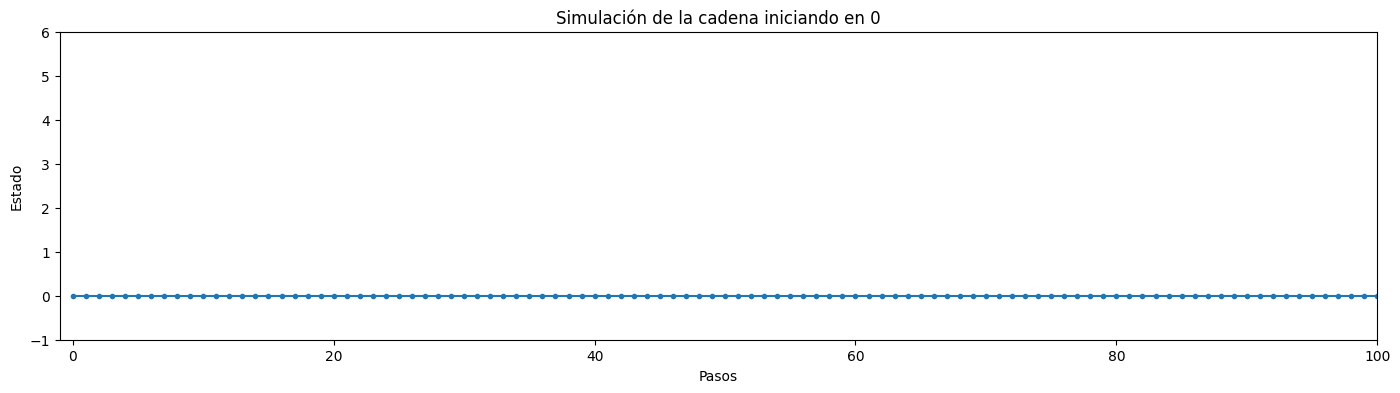

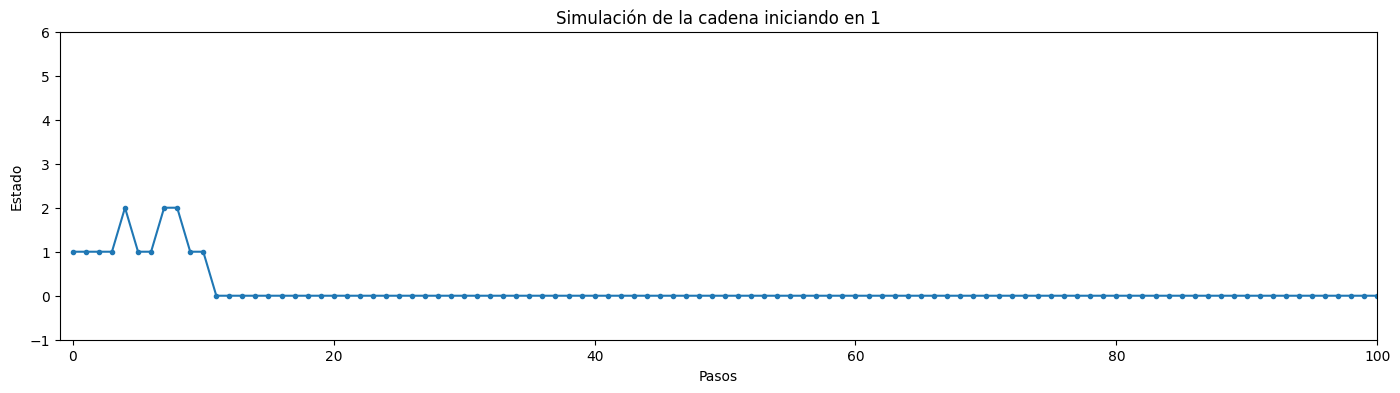

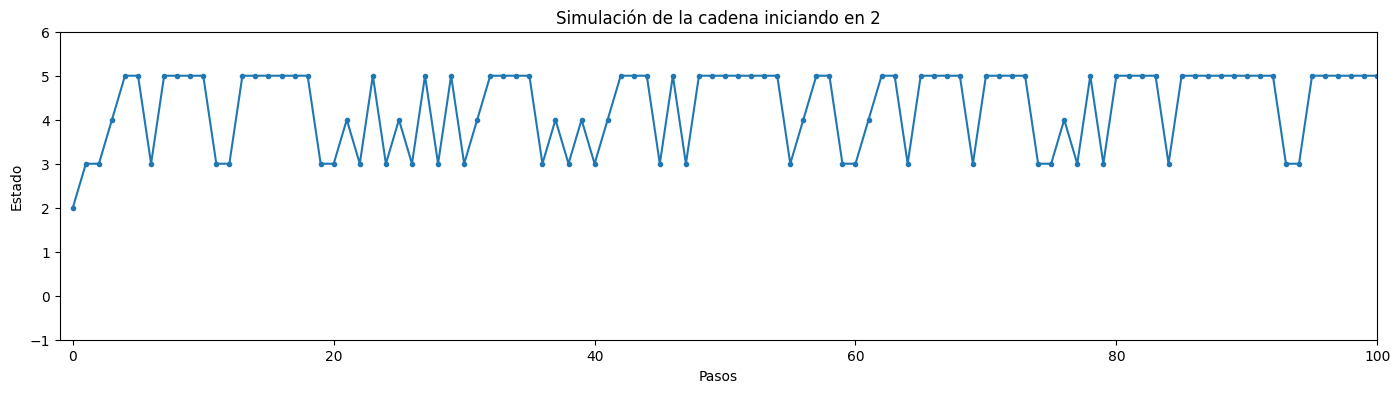

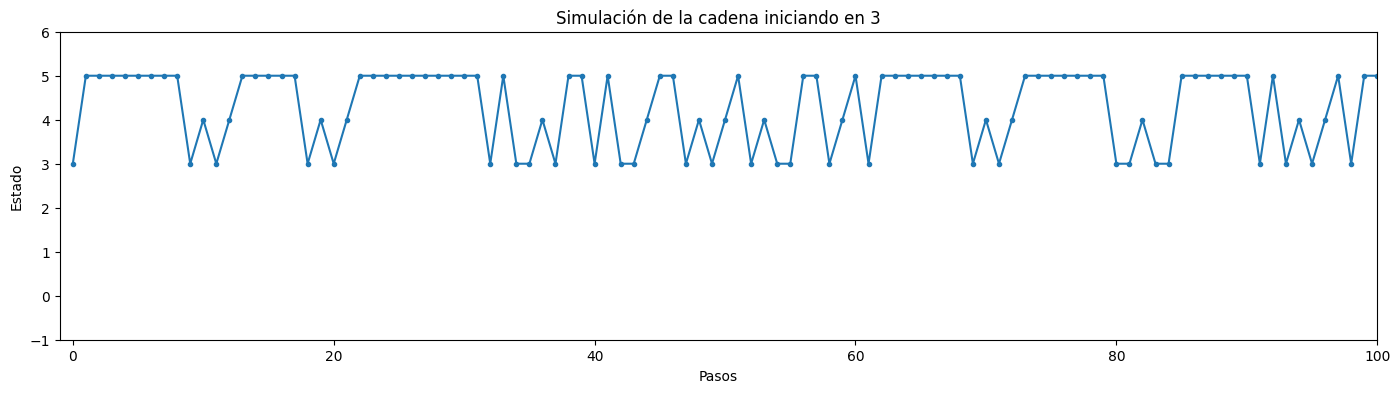

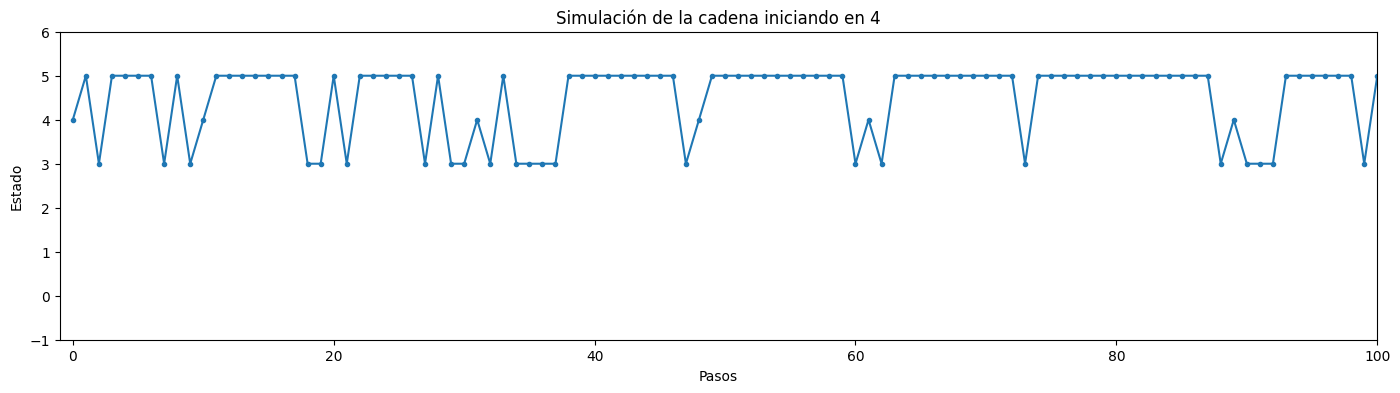

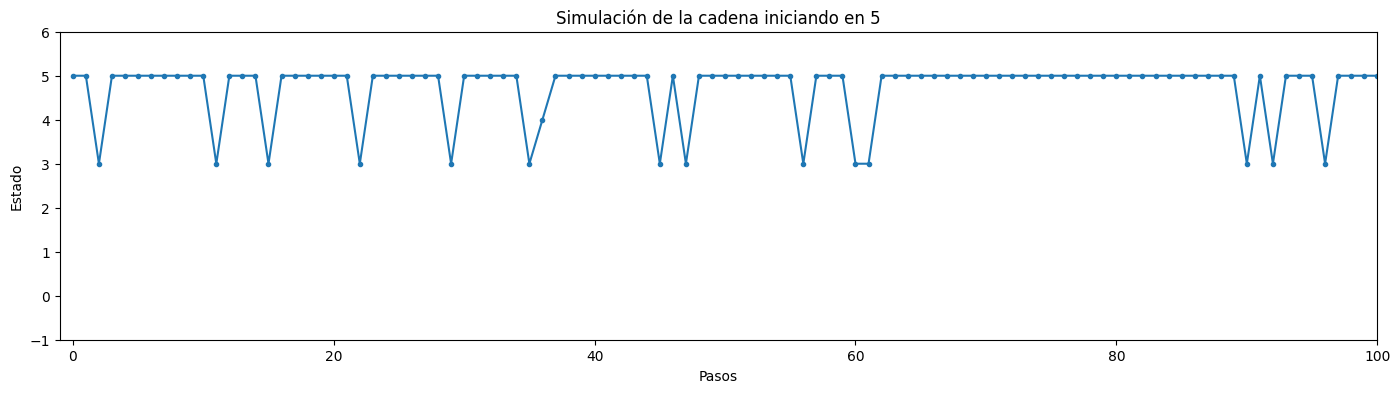

In [6]:
estados = {0,1,2,3,4,5}

# Número de iteraciones
N_iter = 100

for estado in estados:
    # Gráfica de la cadena
    plt.figure(figsize=(17,4))
    plt.plot(chain_simulation(P, estado, n_iter = N_iter).index, chain_simulation(P, estado, N_iter)['estado'], marker = '.' )

    plt.title(f'Simulación de la cadena iniciando en {estado}')
    plt.xlabel('Pasos')
    plt.ylabel('Estado')

    plt.xlim(-1,100)
    plt.ylim(-1,6)


## Distribución estacionaria


In [32]:
def iterate_dist_transition(transition_matrix, dist, error):
    p = dist
    while(np.sqrt(np.dot(p.T -  p @ transition_matrix, p.T -  p @ transition_matrix))>error):
        p = p @ transition_matrix
    return p 

In [33]:
p = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
iterate_dist_transition(P, p, 0.000000000000000001)

array([3.00000000e-01, 1.85505734e-18, 1.66147083e-18, 1.75000000e-01,
       5.83333333e-02, 4.66666667e-01])

### La distribución estacionaria es $\pi = (\frac{3}{10}, 0, 0,\frac{7}{40}, \frac{7}{120},\frac{7}{15})$. En este caso, nos enfocaremos en la cadena cerrada e irreducible $C = \{3,4,5\}$. 

In [23]:
P_sub = np.array([[1/6, 1/3, 1/2],
         [1/2, 0, 1/2],
         [1/4, 0, 3/4]])

In [24]:
p = np.array([1/3,1/3,1/3])
iterate_dist_transition(P_sub, p, 0.000000000000000001)

array([0.25      , 0.08333333, 0.66666667])

Ante esto, si consideramos la subcadena $C$ tenemos que la distribución estacionaria es $\pi_{C} = (\frac{1}{4}, \frac{1}{12},\frac{2}{3})$

In [25]:
df_sub = chain_simulation(P_sub, 0,1000000)

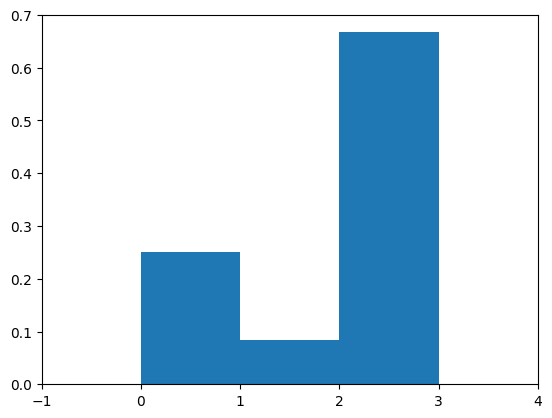

In [26]:
plt.hist(df_sub['estado'], bins = [0,1,2,3], density = True)
plt.xlim(-1,4)
plt.show()

### En este caso, el 0 representa al 3, el 1 al 4 y el 3 al 5. Vemos que aproximadamente el 25% del tiempo la subcadena está en el estado 3, poco menos del 10% en el estado 4 y aproximadamente el 66% en el 5.

## Probabilidades de absorción

Simularemos ahora la cadena de markov original para ver si la frecuencia relativa con la que un estado transitorio es absorbido  u otro es similar a la probabilidad de absorción teórica. En este caso, checaremos que $\rho_{1\hspace{0.5mm}0} = \frac{3}{5}$ y $\rho_{\{3,4,5\}}(1) = \frac{2}{5}$.

In [111]:
def simulate_absortion(transition_matrix, state, selected_set, absortion_sets):
    absortion_set = None
    current_state = state
    absorbed = False
   
    while(not absorbed):
        current_state = stochastic_markov_output(transition_matrix, state = current_state)
        for closed_set in absortion_sets:
            if(current_state in closed_set):
                absortion_set = closed_set
                absorbed = True
                break
    
    return int((absortion_set == selected_set))

En este caso, si la cadena es absorbida por $\{0\}$ la función simulate_absortion regresará 1 o devolverá 0 en caso de que el proceso sea absorbido por otro subconjunto cerrado e irreducible.

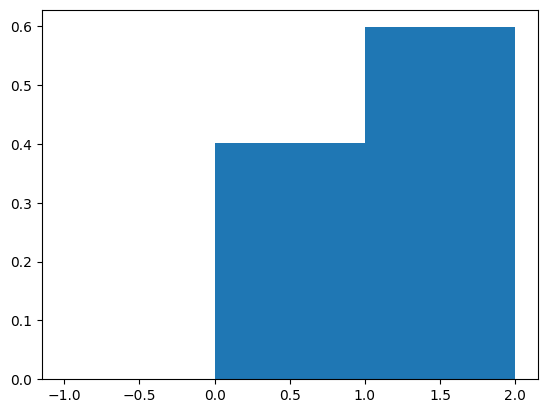

In [114]:
list_absortion = list()

for _ in range(10000):
    list_absortion.append(simulate_absortion(P, 1, {0}, [{0},{3,4,5}]))

plt.hist(list_absortion, bins = [-1,0,1,2], density = True)
plt.show()


En efecto, vemos que en la simulación el la cadena iniciando en 1 fue absorbida por $\{0\}$ aproximadamente un 60% de las veces y llegó al conjunto $\{3,4,5\}$ el 40$ de las iteraciones (esto es, la simulación se acercó a los valores teóricos $\rho_{1\hspace{0.5mm}0} = \frac{3}{5}$ y $\rho_{\{3,4,5\}}(1) = \frac{2}{5}$).